In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
from sklearn import preprocessing

In [2]:
test_df = pd.read_csv("test.csv")
train_df = pd.read_csv("train.csv")

In [3]:
test_df

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan
...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...


In [4]:
train_df

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [5]:
train_df.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [6]:
test_df.isnull().sum()

id             0
keyword       26
location    1105
text           0
dtype: int64

In [7]:
keywords = train_df.dropna(axis=0,subset=['keyword'])

In [8]:
keywords

,id,keyword,location,text,target
31,48,ablaze,Birmingham,@bbcmtd Wholesale Markets ablaze http://t.co/l...,1
32,49,ablaze,Est. September 2012 - Bristol,We always try to bring the heavy. #metal #RT h...,0
33,50,ablaze,AFRICA,#AFRICANBAZE: Breaking news:Nigeria flag set a...,1
34,52,ablaze,"Philadelphia, PA",Crying out for more! Set me ablaze,0
35,53,ablaze,"London, UK",On plus side LOOK AT THE SKY LAST NIGHT IT WAS...,0
...,...,...,...,...,...
7578,10830,wrecked,NaN,@jt_ruff23 @cameronhacker and I wrecked you both,0
7579,10831,wrecked,"Vancouver, Canada",Three days off from work and they've pretty mu...,0
7580,10832,wrecked,London,#FX #forex #trading Cramer: Iger's 3 words tha...,0
7581,10833,wrecked,Lincoln,@engineshed Great atmosphere at the British Li...,0


In [9]:
#want to sort keywords by frequency of occurence.

#make new column to count the keywords

#train_df['count'] = train_df.groupby('keyword')['keyword'].transform(pd.Series.value_counts)
#sort the count column by most frequent.
#train_df.sort('count', ascending=False)
#train_df

#subselection
train_dfSub = keywords[keywords['target']== 1]
#train_dfSub['keyword'].dropna(axis=0) #FIXME
train_dfSub



,id,keyword,location,text,target
31,48,ablaze,Birmingham,@bbcmtd Wholesale Markets ablaze http://t.co/l...,1
33,50,ablaze,AFRICA,#AFRICANBAZE: Breaking news:Nigeria flag set a...,1
37,55,ablaze,World Wide!!,INEC Office in Abia Set Ablaze - http://t.co/3...,1
38,56,ablaze,NaN,Barbados #Bridgetown JAMAICA ÛÒ Two cars set ...,1
46,66,ablaze,"GREENSBORO,NORTH CAROLINA",How the West was burned: Thousands of wildfire...,1
...,...,...,...,...,...
7542,10783,wreckage,"Xi'an, China",Wreckage 'conclusively confirmed' as from miss...,1
7543,10784,wreckage,Mumbai,Wreckage 'Conclusively Confirmed' as From MH37...,1
7552,10795,wrecked,"Santa Cruz, CA",Israel wrecked my home. Now it wants my land. ...,1
7559,10808,wrecked,NaN,300K exotic car wrecked in train accident \nht...,1


In [25]:
freq = pd.DataFrame(columns = ['word', 'count'])
exists = []
values = {}
for index, row in keywords.iterrows():
    if row['keyword'] in exists:
        values[row['keyword']] = values[row['keyword']] + 1
    else:
        values[row['keyword']] = 1
        exists.append(row['keyword'])

for k,v in values.items():
    freq = freq.append({"word": k, "count": v}, ignore_index=True)
#freq = dict(sorted(freq.items(),key = lambda x: x[1], reverse = True)) 

#freq = {k: v for k, v in sorted(freq.items(), key=lambda item: item[1])}

        
keywords = freq.sort_values('count', ascending=False)
keywords

,word,count
202,fatalities,45
6,deluge,42
41,armageddon,42
78,damage,41
171,body%20bags,41
...,...,...
68,forest%20fire,19
66,epicentre,12
67,threat,11
89,inundation,10


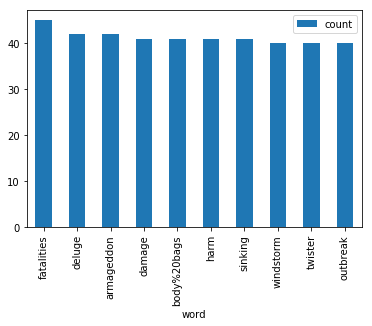

In [29]:
keywords[:10].plot(x= 'word', y='count', kind = 'bar')

In [ ]:
keywords